## PL5

* Consider da following code from 
(https://www.kaggle.com/code/poojagupta0710/regularization-ridge-and-lasso/notebook)

* Consult the related information existing in https://scikit-learn.org/

* Analyze the code and make the changes that seem relevant to you


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [5]:
#Setting seed for reproducability
np.random.seed(10)  

In [6]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [7]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [8]:
data.shape

(117, 2)

In [9]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


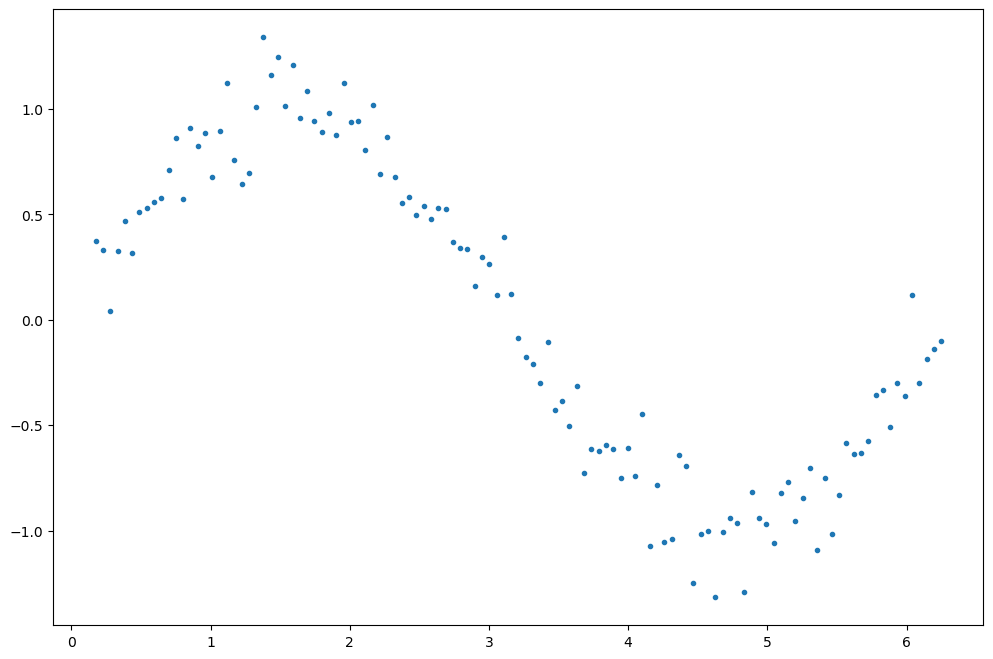

In [10]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.');

In [11]:
# polynomial regression with powers of x from 2 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


In [17]:
0.174533**3
data.shape

(117, 17)

**Creating test and train**

In [14]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)


In [19]:
train.shape

5

In [16]:
train.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,0.000007,0.000002,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,0.000037,0.000010,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,0.000146,0.000048,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,0.000472,0.000181,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07
5,0.436332,0.314605,0.190386,0.083072,0.036247,0.015816,0.006901,0.003011,0.001314,0.000573,2.501346e-04,1.091418e-04,4.762210e-05,2.077906e-05,9.066575e-06,3.956040e-06


In [38]:
test.shape

(44, 16)

## 1. Linear Regression

In [20]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [21]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

In [22]:
train.drop('y', axis=1).head()

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
1,0.226893,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,0.000007,0.000002,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,0.000037,0.000010,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,0.000146,0.000048,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,0.000472,0.000181,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07
5,0.436332,0.190386,0.083072,0.036247,0.015816,0.006901,0.003011,0.001314,0.000573,2.501346e-04,1.091418e-04,4.762210e-05,2.077906e-05,9.066575e-06,3.956040e-06


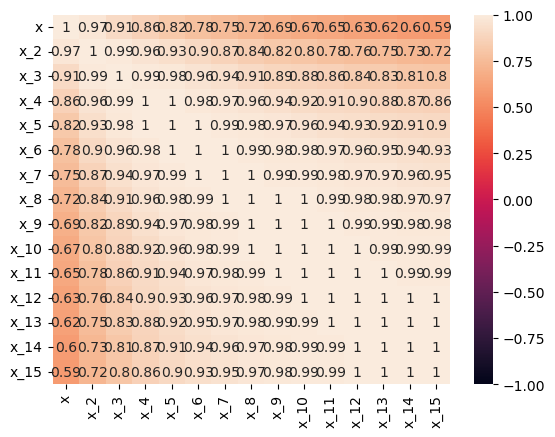

In [23]:
import seaborn as sns
sns.heatmap(train.drop('y', axis=1).corr().round(2),annot=True,vmin=-1, vmax=1);

In [25]:
#Linear Regression with one features
independent_variable_train = X_train[:,0:1]

#linreg = LinearRegression(normalize=True)
linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

Training Error 0.21243619925622553
Testing Error 0.19207574017725043


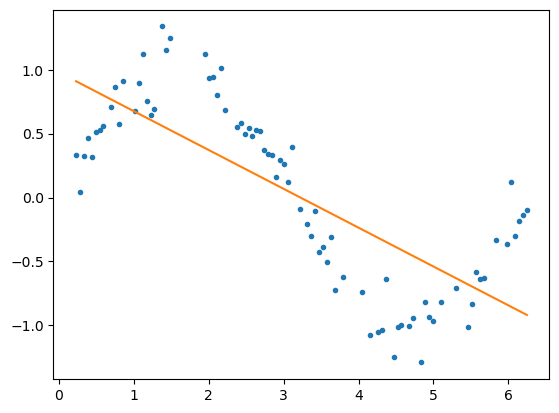

In [26]:
plt.plot(X_train[:,0:1],y_train,'.')
plt.plot(X_train[:,0:1],y_train_pred);

**Linear regression with three features**

In [27]:
train.drop('y', axis=1).columns

Index(['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15'],
      dtype='object')

In [28]:
independent_variable_train = X_train[:,0:3]

#linreg = LinearRegression(normalize=True)
linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

Training Error 0.026228264320776275
Testing Error 0.019392108976922173


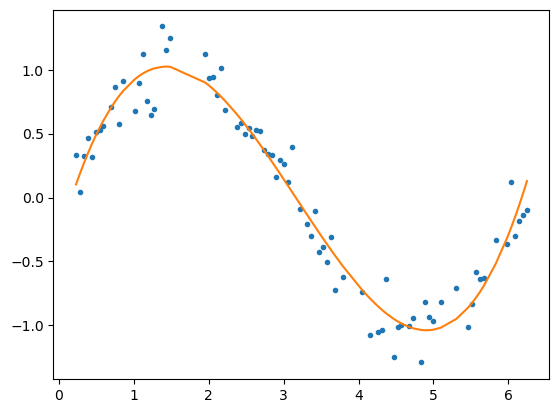

In [29]:
plt.plot(X_train[:,0:1],y_train,'.')
plt.plot(X_train[:,0:1],y_train_pred);

In [50]:
linreg.coef_

array([ 2.21125572, -0.9855638 ,  0.10365236])

**Linear regression with Seven features**

In [51]:
train.drop('y', axis=1).columns[0:8]

Index(['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8'], dtype='object')

In [30]:
independent_variable_train = X_train[:,0:8]

#linreg = LinearRegression(normalize=True)
linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:8]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

Training Error 0.021616612107788407
Testing Error 0.01881668648079079


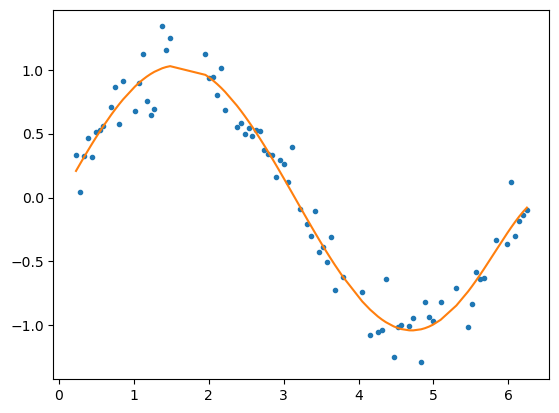

In [31]:
plt.plot(X_train[:,0:1],y_train,'.')
plt.plot(X_train[:,0:1],y_train_pred);

In [55]:
linreg.coef_

array([ 5.05967812e+00, -7.01727155e+00,  5.98534593e+00, -3.07646701e+00,
        9.23889428e-01, -1.60125806e-01,  1.49196804e-02, -5.79130878e-04])

**Defining a function which will fit linear regression model, plot the results, and return the coefficients**

In [56]:
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    #linreg = LinearRegression(normalize=True)
    linreg = LinearRegression()
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [57]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [58]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

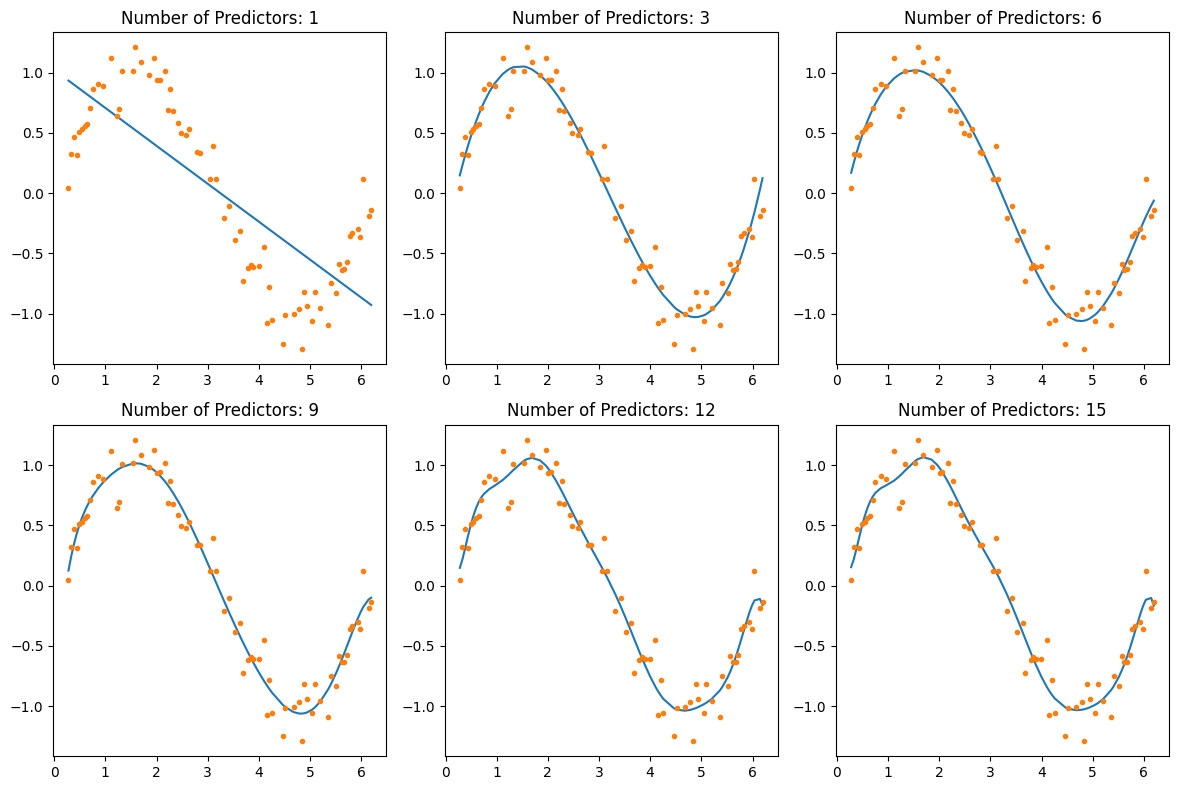

In [59]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [60]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


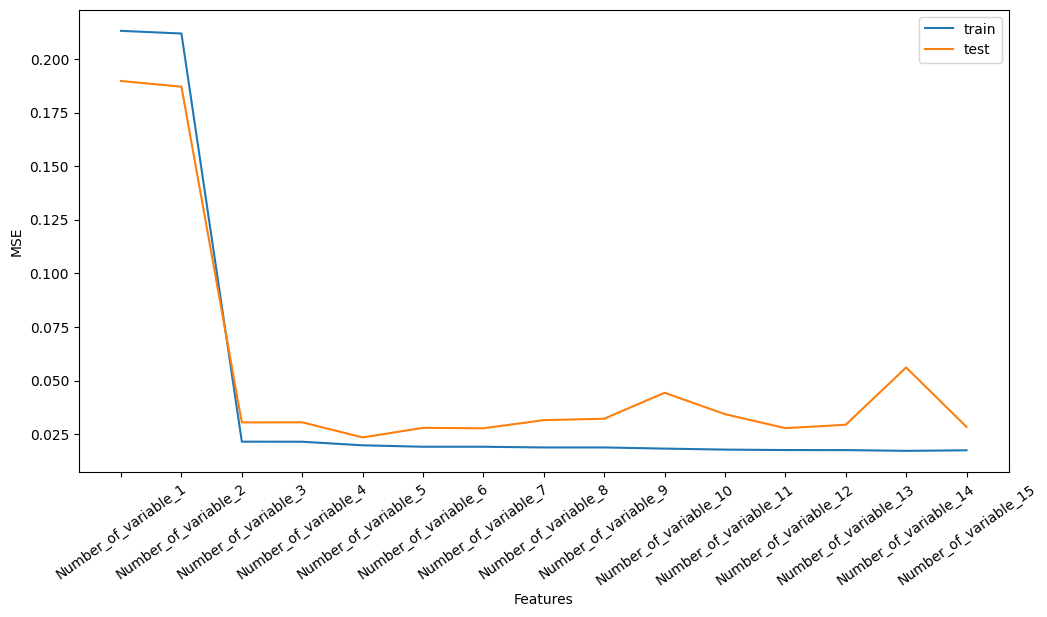

In [61]:
plt.figure(figsize=(12,6))
plt.plot(coef_matrix_simple['mrss_train'])
plt.plot(coef_matrix_simple['mrss_test'])
plt.xlabel('Features')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.xticks(rotation = 35)
plt.show();

# 2. Ridge Regression

The objective of Ridge is to minimize the MSE & Square of cofficient

$$J(\theta) = \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2 + \lambda(\theta^2) $$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

where $\lambda$ is the penality term.

* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique.

In [62]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [63]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [74]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    #ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [75]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [76]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

In [77]:
train.drop('y', axis=1).columns

Index(['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15'],
      dtype='object')

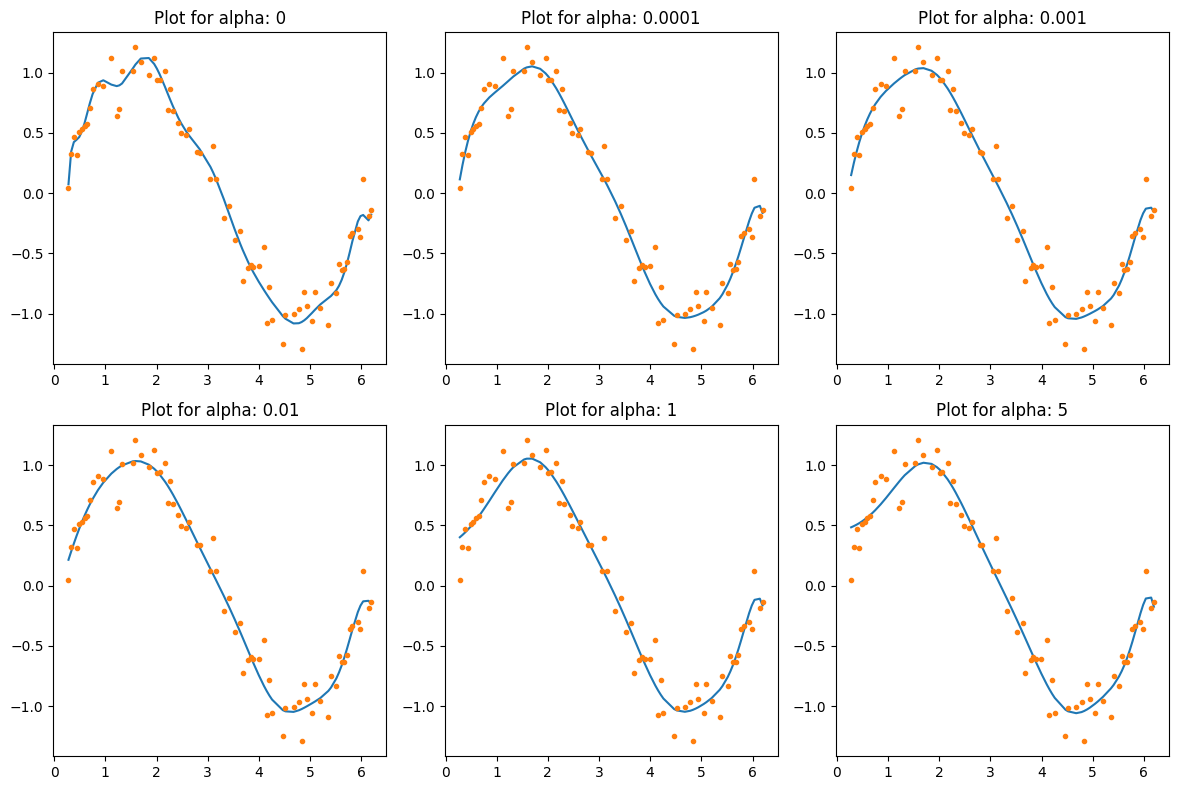

In [78]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)
#coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [79]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_1e-08,0.017,0.033,-1.6,18,-93,2.9e+02,-5.4e+02,6.5e+02,-5.4e+02,3.1e+02,-1.3e+02,38,-8.2,1.3,-0.14,0.01,-0.00046,9.1e-06
alpha_0.0001,0.018,0.035,-0.73,3.5,-0.86,-3,0.86,3,-1.3,-2.4,3.1,-1.7,0.58,-0.12,0.017,-0.0016,8e-05,-1.8e-06
alpha_0.001,0.018,0.032,-0.53,2.8,-1,-1.4,0.57,1.2,-0.5,-0.91,1,-0.51,0.14,-0.025,0.0025,-0.00013,2.1e-06,6.9e-08
alpha_0.01,0.018,0.027,-0.18,1.4,0.064,-0.54,-0.19,0.29,0.19,-0.21,-0.097,0.19,-0.11,0.032,-0.0059,0.00066,-4.1e-05,1.1e-06
alpha_1,0.02,0.024,0.32,0.21,0.2,0.12,0.029,-0.046,-0.067,-0.0076,0.059,-0.03,0.004,0.0012,-0.00053,8.5e-05,-6.6e-06,2e-07
alpha_5,0.022,0.026,0.45,0.095,0.11,0.092,0.051,-0.0013,-0.04,-0.03,0.017,0.02,-0.02,0.0075,-0.0015,0.00019,-1.2e-05,3.3e-07
alpha_10,0.023,0.026,0.48,0.059,0.078,0.081,0.07,0.035,-0.022,-0.065,-0.022,0.092,-0.064,0.022,-0.0045,0.00054,-3.6e-05,1e-06
alpha_20,0.026,0.031,0.54,0.041,0.055,0.055,0.042,0.015,-0.015,-0.026,-0.0012,0.022,-0.014,0.0044,-0.00076,7.5e-05,-3.9e-06,8.1e-08
alpha_25,0.027,0.033,0.55,0.036,0.048,0.048,0.037,0.014,-0.012,-0.021,-0.0014,0.016,-0.0091,0.0024,-0.00031,1.8e-05,1.2e-08,-3.3e-08


In [80]:
coef_matrix_ridge['mrss_train']

alpha_0        0.016
alpha_1e-08    0.017
alpha_0.0001   0.018
alpha_0.001    0.018
alpha_0.01     0.018
alpha_1         0.02
alpha_5        0.022
alpha_10       0.023
alpha_20       0.026
alpha_25       0.027
Name: mrss_train, dtype: object

In [81]:
coef_matrix_ridge['mrss_test']

alpha_0          0.2
alpha_1e-08    0.033
alpha_0.0001   0.035
alpha_0.001    0.032
alpha_0.01     0.027
alpha_1        0.024
alpha_5        0.026
alpha_10       0.026
alpha_20       0.031
alpha_25       0.033
Name: mrss_test, dtype: object

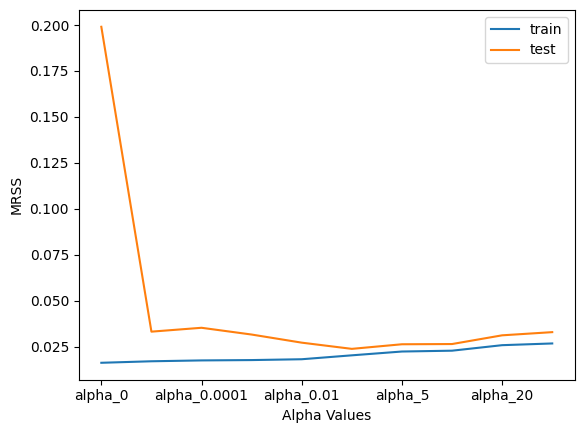

In [82]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test']);

In [83]:
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [84]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int32

# 3. Lasso

The objective of Lasso is to minimize the MSE & Square of cofficient

$$J(\theta) = \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2 + \lambda(\theta) $$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

where $\lambda$ is the penality term.

* It uses L1 regularization technique (will be discussed later in this article)
* It is generally used when we have more number of features, because it automatically does feature selection.

In [93]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [94]:
#Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [95]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression()
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret

In [96]:
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [97]:
#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

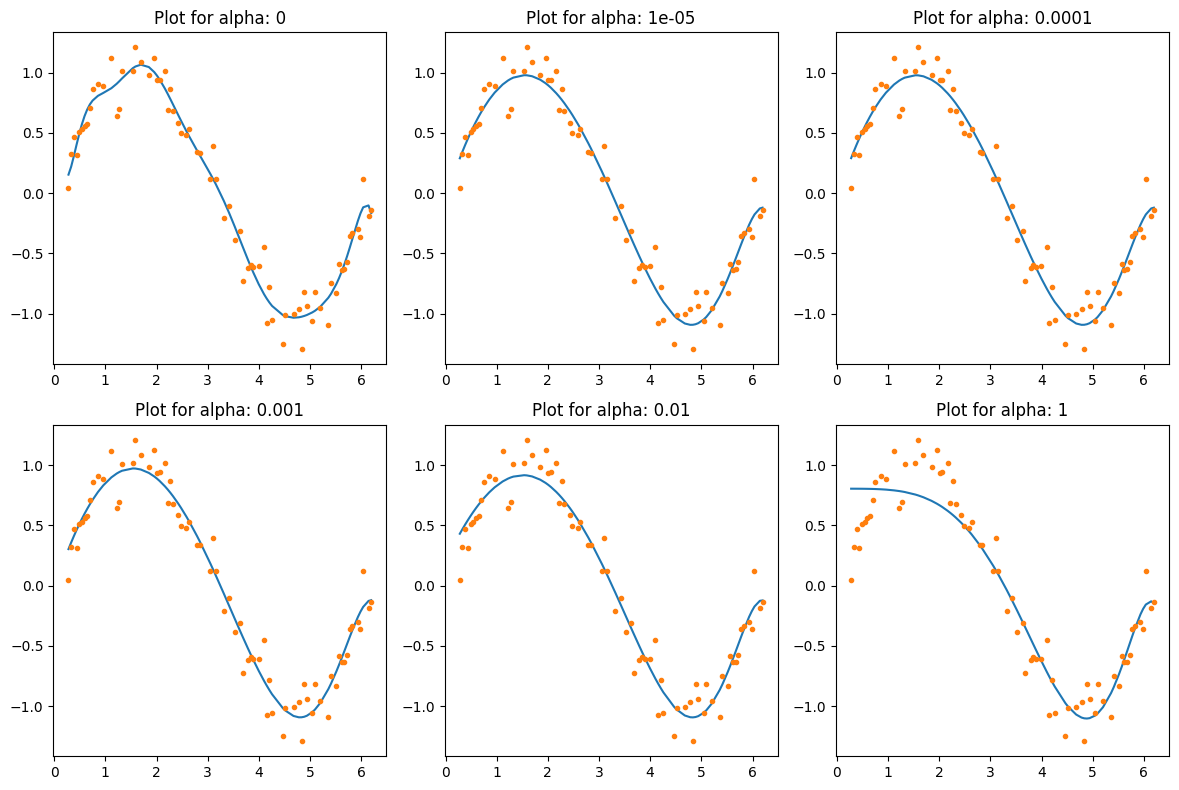

In [98]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

In [99]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.017,0.028,1.3,-13,50,-76,42,26,-59,46,-22,6.8,-1.5,0.22,-0.023,0.0015,-5.8e-05,1e-06
alpha_1e-10,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-08,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-05,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_0.0001,0.02,0.026,-0.052,1.3,-0.44,-0.0038,0.0022,0.00039,4.8e-05,5e-06,4.5e-07,2.9e-08,-3.9e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_0.001,0.02,0.026,-0.029,1.3,-0.43,-0.0059,0.0022,0.00039,4.8e-05,5.1e-06,4.6e-07,3e-08,-2.9e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.4e-12,-1.1e-12
alpha_0.01,0.024,0.028,0.2,0.91,-0.25,-0.028,0.0016,0.00044,5.7e-05,6.3e-06,6e-07,4.4e-08,7.2e-10,-6.2e-10,-1.8e-10,-3.9e-11,-7.3e-12,-1.3e-12
alpha_1,0.052,0.052,0.8,0,0,-0,-0.0091,-4.6e-05,0.00014,1.5e-05,1.4e-06,1.2e-07,5.6e-09,-6.4e-10,-2.8e-10,-6.4e-11,-1.2e-11,-2.2e-12
alpha_5,0.056,0.064,0.72,-0,-0,-0,-0.0021,-0.0019,0.00012,2.9e-05,2.6e-06,2.2e-07,1.3e-08,-4.4e-10,-3.5e-10,-8.6e-11,-1.7e-11,-3e-12
alpha_10,0.056,0.068,0.71,-0,-0,-0,-0,-0.0023,3e-05,4.1e-05,3.5e-06,2.9e-07,1.8e-08,-4.1e-10,-4.2e-10,-1.1e-10,-2.1e-11,-3.8e-12


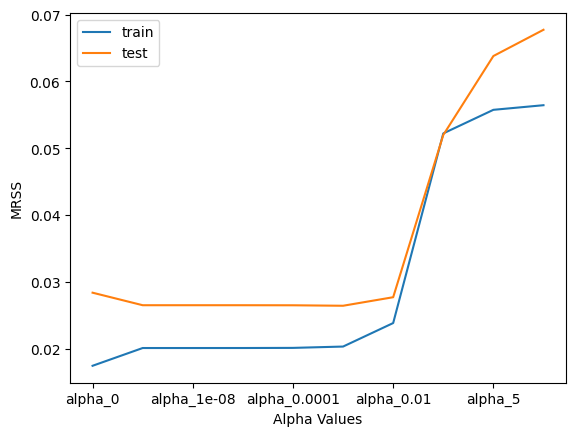

In [100]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test']);

In [101]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         3
alpha_5         3
alpha_10        4
dtype: int32

## 4. Elastic Net Regression

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term, therefore its equation look like as follows:

$$J(\theta) = \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2 + \lambda_1(\theta) + \lambda_2(\theta^2) $$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

where $\lambda$ is the penality term.

In [102]:
from sklearn.linear_model import ElasticNet

In [103]:
# define model
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

In [104]:
model.fit(train_x, train_y)

ElasticNet(alpha=0.5)

In [105]:
model.coef_

array([ 0.00000000e+00,  0.00000000e+00, -7.82316884e-03, -7.58109017e-03,
        3.07660847e-04,  9.37670120e-05,  1.14095800e-05,  1.22508225e-06,
        1.11205370e-07,  6.79194730e-09, -2.78514981e-10, -2.09938686e-10,
       -5.33387022e-11, -1.08721295e-11, -2.01464697e-12])

In [106]:
model.predict(test_x)

array([ 0.82465504,  0.82459235,  0.81763586,  0.81396017,  0.80906954,
        0.80610018,  0.79896993,  0.77910068,  0.77278366,  0.76586322,
        0.74115966,  0.72108436,  0.70986952,  0.68493056,  0.62419132,
        0.52574174,  0.45366326,  0.37141304,  0.34171669,  0.24585366,
        0.21168369,  0.17643833,  0.02531931, -0.01479184, -0.09744221,
       -0.18287813, -0.27045586, -0.40412523, -0.58158219, -0.66738255,
       -0.86214414, -0.8961232 , -0.92794464, -1.0081946 , -1.02910414,
       -1.06077815, -1.07068579, -1.0219803 , -0.96499375, -0.92915194,
       -0.79385581, -0.31190426, -0.13266773, -0.13500442])

In [107]:
sum((model.predict(train_x)-train_y)**2)/train_y.shape[0]

0.05438666688807494

In [108]:
sum((model.predict(test_x)-test_y)**2)/test_y.shape[0]

0.051315684074732866